
# Dataset Loading and visualization

In [1]:
# importing libraries
import pandas as pd

In [6]:
df = pd.read_excel("C:\\Users\\Sankalp Shukla\\Downloads\\Superstore.xlsx")

In [23]:
df.shape

(9994, 21)

In [12]:
f_sales = df.loc[df["Category"] == "Furniture"]

In [14]:
f_sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [15]:
f_sales.shape

(2121, 21)

In [16]:
f_sales.index

Index([   0,    1,    3,    5,   10,   23,   24,   27,   29,   36,
       ...
       9931, 9937, 9938, 9947, 9955, 9962, 9964, 9980, 9989, 9990],
      dtype='int64', length=2121)

In [22]:
f_sales.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [24]:
f_sales["Order Date"].min()

Timestamp('2014-01-06 00:00:00')

In [25]:
f_sales["Order Date"].max()

Timestamp('2017-12-30 00:00:00')

In [28]:
# basic idea is clear that dataset contains 4 year of furniture saels data

# Data Preprocessing

In [31]:
cols = ["Row ID", "Order ID", "Ship Date", "Ship Mode", "Customer ID", "Customer Name", "Segment", "Country", "City", "State", "Postal Code", "Region", "Product ID", "Category", "Sub-Category", "Product Name", "Quantity", "Discount", "Profit"]

In [32]:
f_sales.drop(cols, inplace=True, axis = 1)

C:\Users\Sankalp Shukla\AppData\Local\Temp\ipykernel_984\3582421968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_sales.drop(cols, inplace=True, axis = 1)


In [34]:
f_sales.head()

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840


In [35]:
# sorting the datain ascending order
f_sales = f_sales.sort_values("Order Date")

In [36]:
f_sales.head()

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940


In [37]:
f_sales.isnull().sum()

Order Date    0
Sales         0
dtype: int64

# Reordering the index's

In [39]:
f_sales = f_sales.groupby("Order Date")["Sales"].sum().reset_index()

In [40]:
f_sales.head()

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


In [128]:
# Indexing to order date
f_sales = f_sales.set_index("Order Date")

KeyError: "None of ['Order Date'] are in the columns"

In [129]:
f_sales.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

# Resampling, Upsampling and Downsampling

In [47]:
y = f_sales['Sales'].resample('MS').mean()

In [50]:
y

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

# Visualizing Time Series Data for Furniture Sales

In [51]:
import matplotlib as plt

<Axes: xlabel='Order Date'>

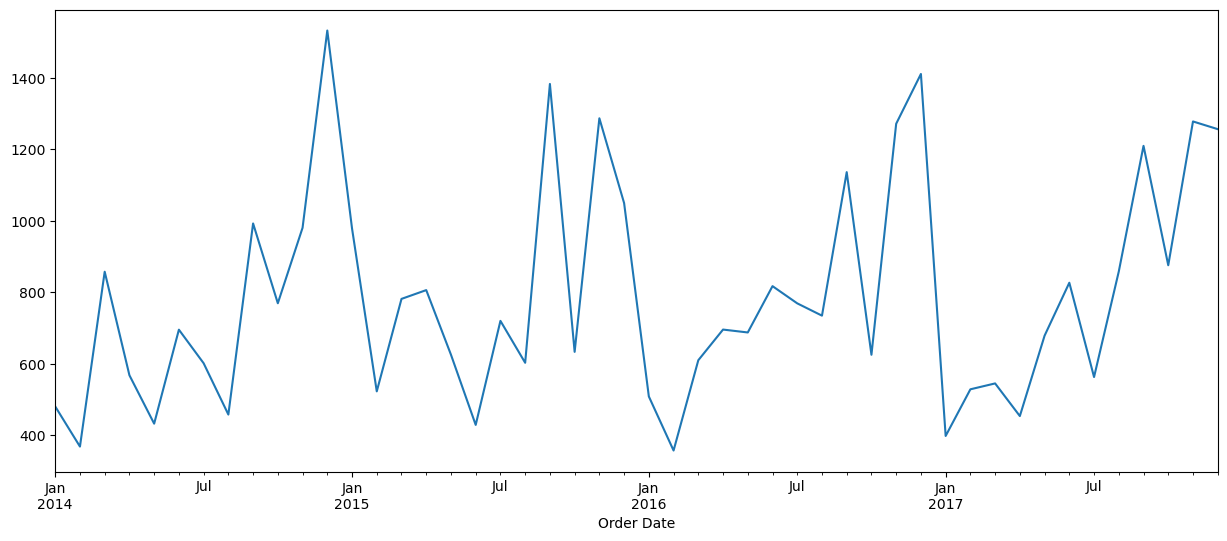

In [52]:
y.plot(figsize=(15,6))

In [53]:
import matplotlib.pyplot as plt

In [54]:
print(plt.rcParams.get('figure.figsize'))

[6.4, 4.8]


In [64]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,10

# Components 

In [56]:
# systemic : that are modelled = level, trend, seasonality
# unsystematic : which can not be modelled = noise

In [57]:
# level - avg value of series
# trend - change of increasing and decreasing value in series 
# seasonality - repeating short term cycle
# noise - rando variation


In [59]:
# y(t) = level + trend + seasonality + noise

In [65]:
import statsmodels.api as sm

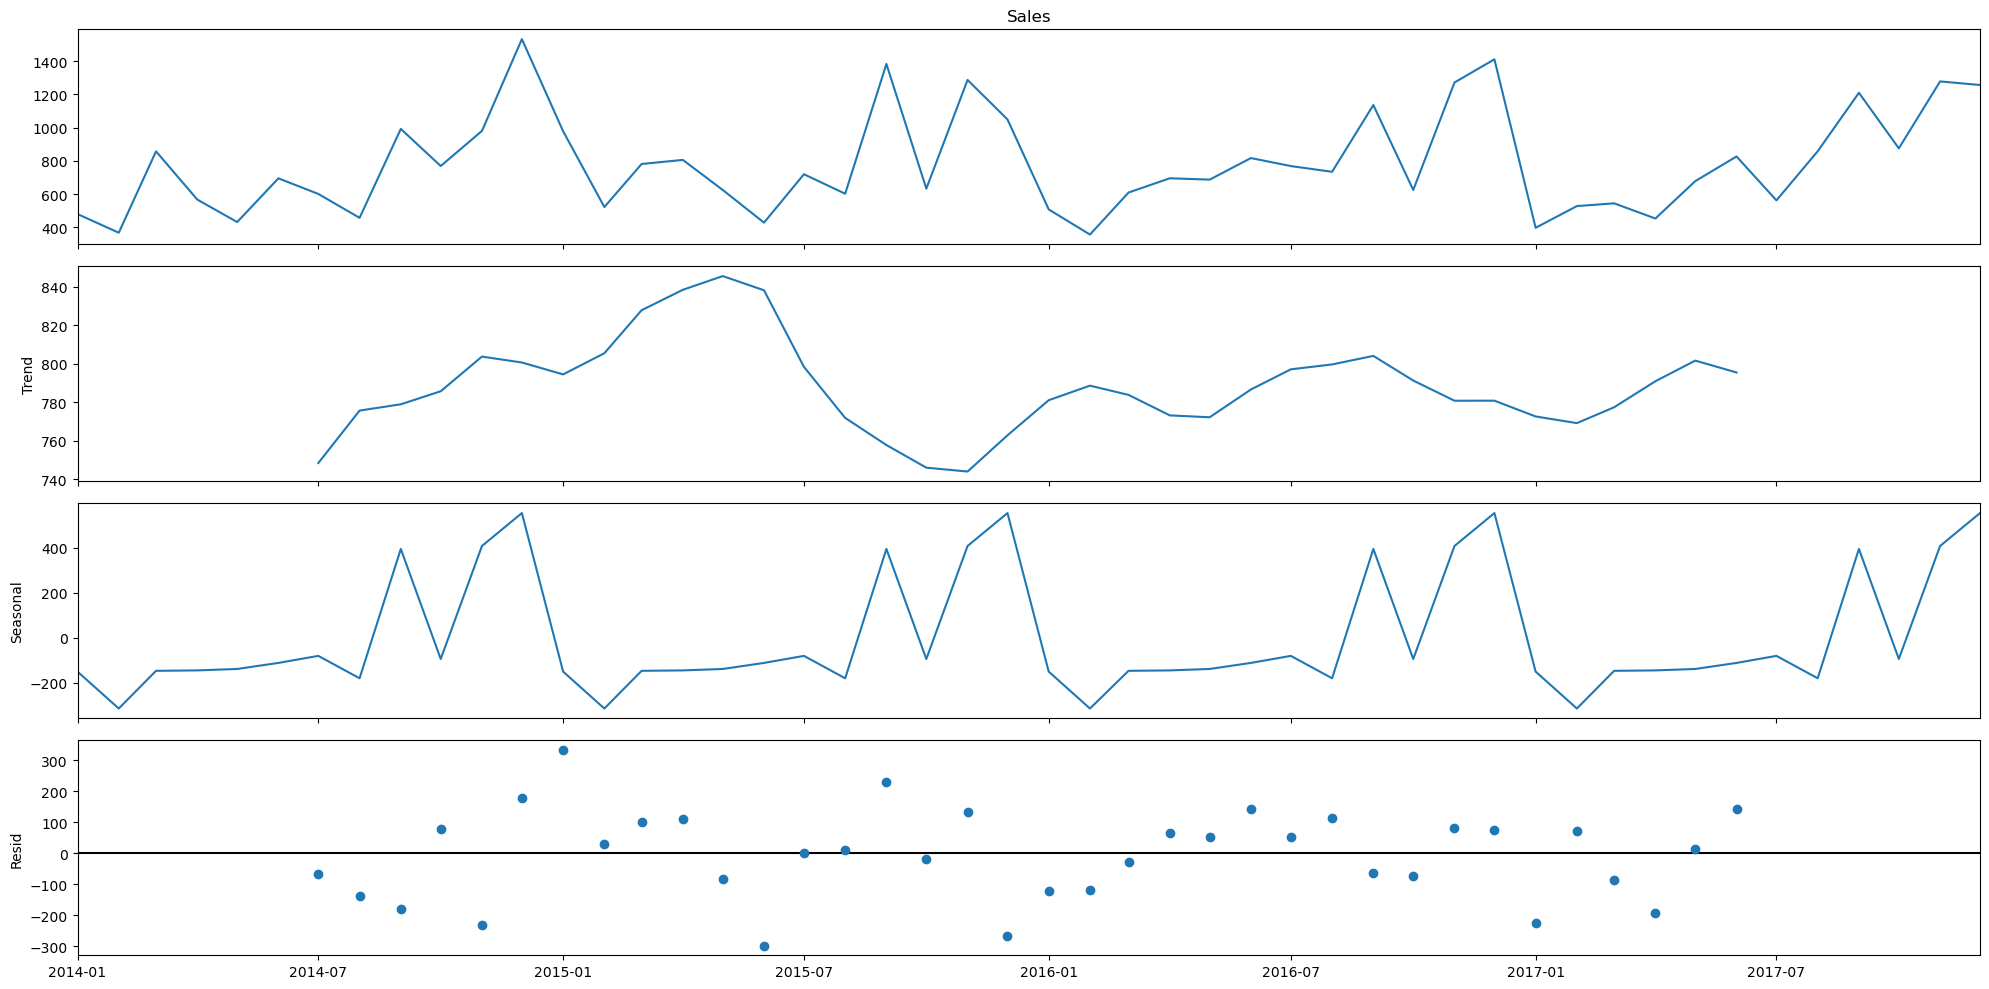

In [66]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

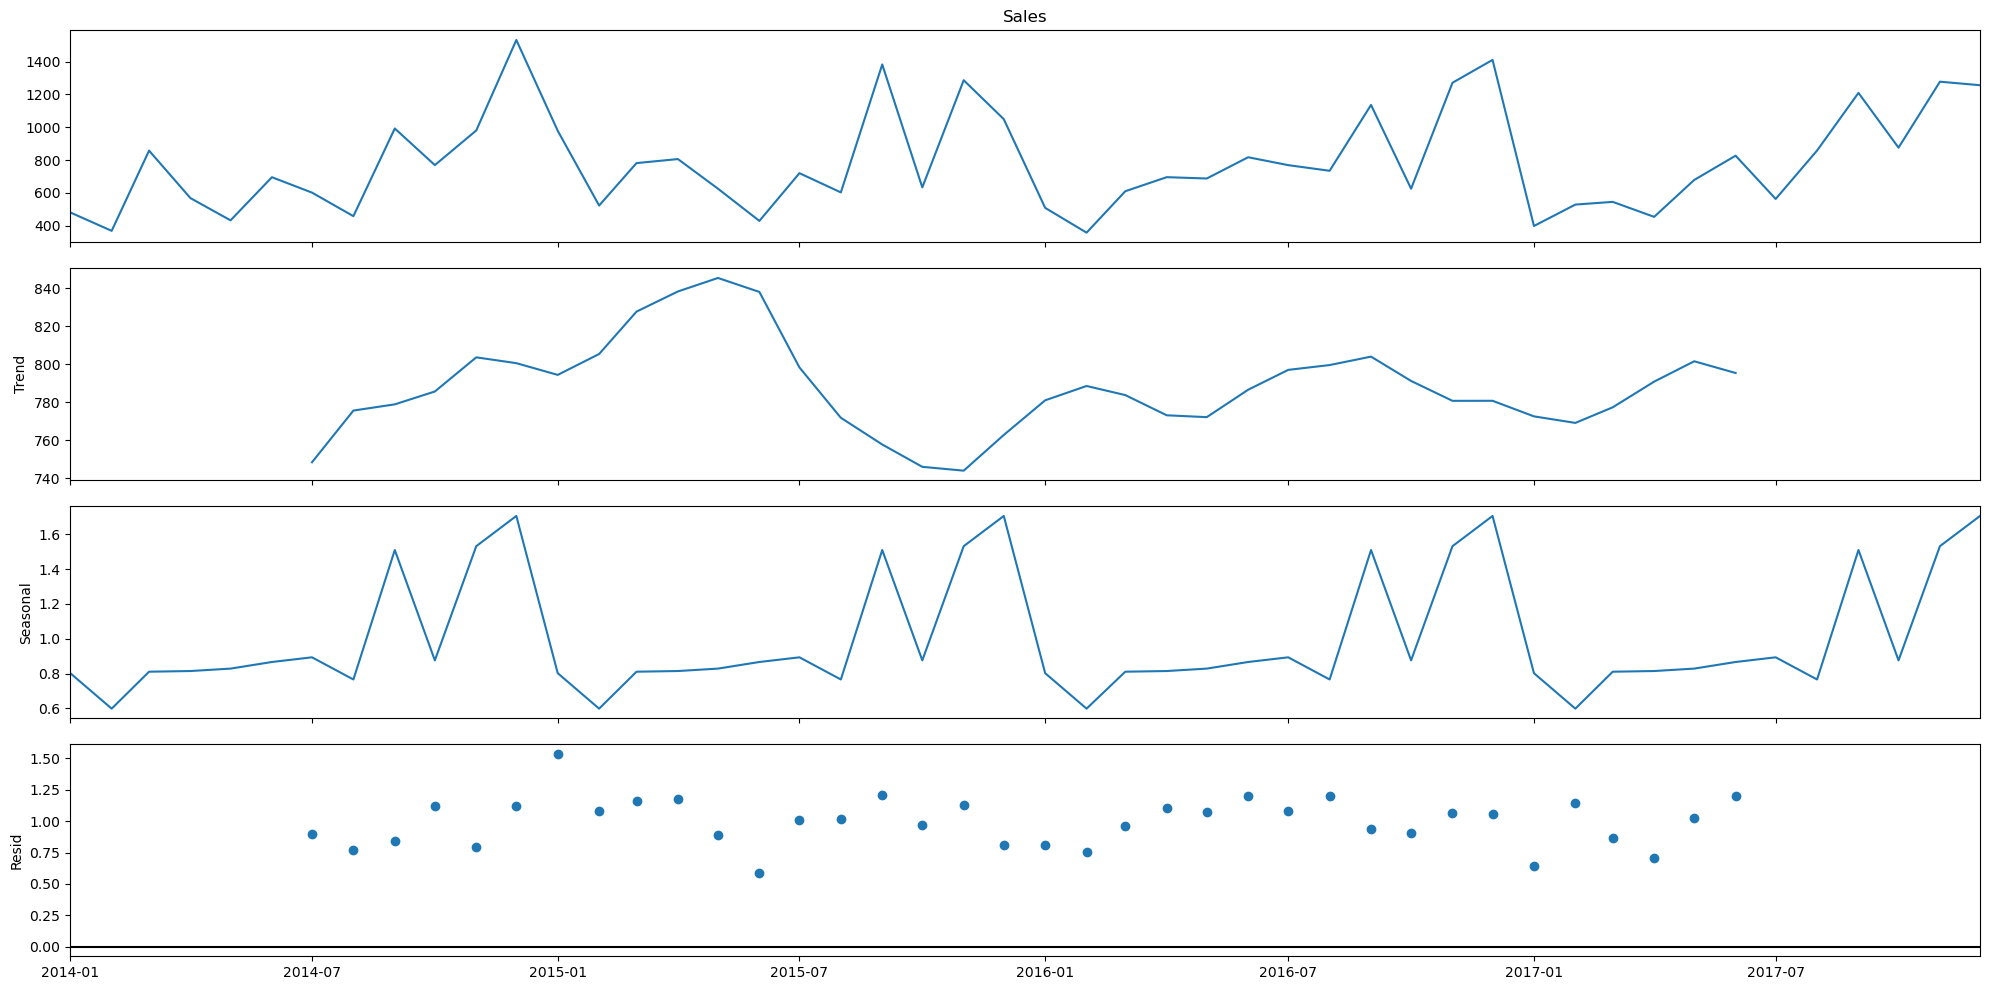

In [67]:
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative')
fig = decomposition.plot()
plt.show()

# Building model using ARIMA

In [68]:
# Time series forecasting with ARIMA (Auto Regressive Integrated Moving Average)

In [69]:
# SARIMAX : method to model and predict feature points in python

In [71]:
# ARIMA componants (p, d, q) : 
# P = auto regressive part (Incorporate effects of past values on the model)
# D = Diffference in values and its effects
# Q = allows us to set the error of the model 

In [72]:
import itertools

In [78]:
p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

In [81]:
print("Examples of parameters combinations for ARIMA")
print('SARIMAX : {} x{} '.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX : {} x{} '.format(pdq[1],seasonal_pdq[2]))
print('SARIMAX : {} x{} '.format(pdq[2],seasonal_pdq[3]))
print('SARIMAX : {} x{} '.format(pdq[2],seasonal_pdq[4]))

Examples of parameters combinations for ARIMA
SARIMAX : (0, 0, 1) x(0, 0, 1, 12) 
SARIMAX : (0, 0, 1) x(0, 1, 0, 12) 
SARIMAX : (0, 1, 0) x(0, 1, 1, 12) 
SARIMAX : (0, 1, 0) x(1, 0, 0, 12) 


In [82]:
# Using grid search to programatically identify the right PDQ values of SARIMAX to train ARIMA

In [83]:
# Using AIC method - Akaike Information Criterion

In [90]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod=sm.tsa.statespace.SARIMAX(y,
                                          order=param,
                                          seasonal_order=param_seasonal,
                                          enforce_stationary=False,
                                          enforce_invertibility=False)
            results = mod.fit()
            print("ARIMA{}*{}12 - AIC:{}".format(param,param_seasonal, results.aic))
        except:
            continue

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments

ARIMA(0, 0, 0)*(0, 0, 0, 12)12 - AIC:784.7193402038779
ARIMA(0, 0, 0)*(0, 0, 1, 12)12 - AIC:2172.484488531284
ARIMA(0, 0, 0)*(0, 1, 0, 12)12 - AIC:495.3709027489218
ARIMA(0, 0, 0)*(0, 1, 1, 12)12 - AIC:489.83053264642945
ARIMA(0, 0, 0)*(1, 0, 0, 12)12 - AIC:691.7786646550559
ARIMA(0, 0, 0)*(1, 0, 1, 12)12 - AIC:686.6408967825558
ARIMA(0, 0, 0)*(1, 1, 0, 12)12 - AIC:491.2539819427663
ARIMA(0, 0, 0)*(1, 1, 1, 12)12 - AIC:491.8095630483064
ARIMA(0, 0, 1)*(0, 0, 0, 12)12 - AIC:751.0635462763071


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword argu

ARIMA(0, 0, 1)*(0, 0, 1, 12)12 - AIC:2164.045666117372
ARIMA(0, 0, 1)*(0, 1, 0, 12)12 - AIC:497.0445558719427
ARIMA(0, 0, 1)*(0, 1, 1, 12)12 - AIC:491.66407712869113
ARIMA(0, 0, 1)*(1, 0, 0, 12)12 - AIC:689.6572892334616


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword argu

ARIMA(0, 0, 1)*(1, 0, 1, 12)12 - AIC:694.3394379266448
ARIMA(0, 0, 1)*(1, 1, 0, 12)12 - AIC:493.19798657858945
ARIMA(0, 0, 1)*(1, 1, 1, 12)12 - AIC:493.62935223533356
ARIMA(0, 1, 0)*(0, 0, 0, 12)12 - AIC:691.6686053888744


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for 

ARIMA(0, 1, 0)*(0, 0, 1, 12)12 - AIC:1997.0166031529657
ARIMA(0, 1, 0)*(0, 1, 0, 12)12 - AIC:501.19171493703334
ARIMA(0, 1, 0)*(0, 1, 1, 12)12 - AIC:498.22118357097435
ARIMA(0, 1, 0)*(1, 0, 0, 12)12 - AIC:672.7905898082462


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for 

ARIMA(0, 1, 0)*(1, 0, 1, 12)12 - AIC:2300.4652780633387
ARIMA(0, 1, 0)*(1, 1, 0, 12)12 - AIC:500.1070474247372
ARIMA(0, 1, 0)*(1, 1, 1, 12)12 - AIC:500.0205212320167
ARIMA(0, 1, 1)*(0, 0, 0, 12)12 - AIC:679.3515257502494


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for 

ARIMA(0, 1, 1)*(0, 0, 1, 12)12 - AIC:1967.5733253862682
ARIMA(0, 1, 1)*(0, 1, 0, 12)12 - AIC:489.63451139732274
ARIMA(0, 1, 1)*(0, 1, 1, 12)12 - AIC:482.83195279013074
ARIMA(0, 1, 1)*(1, 0, 0, 12)12 - AIC:656.5174592671868


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword argu

ARIMA(0, 1, 1)*(1, 0, 1, 12)12 - AIC:2109.9172569576103
ARIMA(0, 1, 1)*(1, 1, 0, 12)12 - AIC:484.7116747699503
ARIMA(0, 1, 1)*(1, 1, 1, 12)12 - AIC:484.8279025405259
ARIMA(1, 0, 0)*(0, 0, 0, 12)12 - AIC:707.8812143775962


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for 

ARIMA(1, 0, 0)*(0, 0, 1, 12)12 - AIC:2133.936469884403
ARIMA(1, 0, 0)*(0, 1, 0, 12)12 - AIC:496.9636902231822
ARIMA(1, 0, 0)*(0, 1, 1, 12)12 - AIC:491.643459167974
ARIMA(1, 0, 0)*(1, 0, 0, 12)12 - AIC:682.5313939615457


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for 

ARIMA(1, 0, 0)*(1, 0, 1, 12)12 - AIC:681.1993976473409
ARIMA(1, 0, 0)*(1, 1, 0, 12)12 - AIC:493.1879623942239
ARIMA(1, 0, 0)*(1, 1, 1, 12)12 - AIC:493.60743074355065
ARIMA(1, 0, 1)*(0, 0, 0, 12)12 - AIC:697.3491224666061


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning

ARIMA(1, 0, 1)*(0, 0, 1, 12)12 - AIC:1962.7005737900909
ARIMA(1, 0, 1)*(0, 1, 0, 12)12 - AIC:498.8527554530663
ARIMA(1, 0, 1)*(0, 1, 1, 12)12 - AIC:493.5574635490884
ARIMA(1, 0, 1)*(1, 0, 0, 12)12 - AIC:673.3016206357473


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as 

ARIMA(1, 0, 1)*(1, 0, 1, 12)12 - AIC:669.7198493002896
ARIMA(1, 0, 1)*(1, 1, 0, 12)12 - AIC:495.08266720142456
ARIMA(1, 0, 1)*(1, 1, 1, 12)12 - AIC:495.3239053982842
ARIMA(1, 1, 0)*(0, 0, 0, 12)12 - AIC:684.9765838986987
ARIMA(1, 1, 0)*(0, 0, 1, 12)12 - AIC:1883.752563556079
ARIMA(1, 1, 0)*(0, 1, 0, 12)12 - AIC:494.3112171937179


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword argu

ARIMA(1, 1, 0)*(0, 1, 1, 12)12 - AIC:490.6242752116804
ARIMA(1, 1, 0)*(1, 0, 0, 12)12 - AIC:665.2664123033893


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword argu

ARIMA(1, 1, 0)*(1, 0, 1, 12)12 - AIC:2171.1035377097687
ARIMA(1, 1, 0)*(1, 1, 0, 12)12 - AIC:491.854201168403
ARIMA(1, 1, 0)*(1, 1, 1, 12)12 - AIC:492.57544157675414
ARIMA(1, 1, 1)*(0, 0, 0, 12)12 - AIC:678.4136280158493


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword argu

ARIMA(1, 1, 1)*(0, 0, 1, 12)12 - AIC:2003.9120108184247
ARIMA(1, 1, 1)*(0, 1, 0, 12)12 - AIC:490.87910802444185
ARIMA(1, 1, 1)*(0, 1, 1, 12)12 - AIC:484.59366780426836
ARIMA(1, 1, 1)*(1, 0, 0, 12)12 - AIC:656.534404875234


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword argu

ARIMA(1, 1, 1)*(1, 0, 1, 12)12 - AIC:1983.2810324920988
ARIMA(1, 1, 1)*(1, 1, 0, 12)12 - AIC:486.5631981200077
ARIMA(1, 1, 1)*(1, 1, 1, 12)12 - AIC:486.5821503897485


In [95]:
mod = sm.tsa.statespace.SARIMAX(y,order=(0, 1, 1),seasonal_order=(0, 1, 1, 12),enforce_stationality=False,enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000   1061.683     -0.001      0.999   -2081.861    2079.861
ma.S.L12      -1.0001   1061.749     -0.001      0.999   -2081.989    2079.989
sigma2      2.686e+04      0.002   1.54e+07      0.000    2.69e+04    2.69e+04


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationality']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


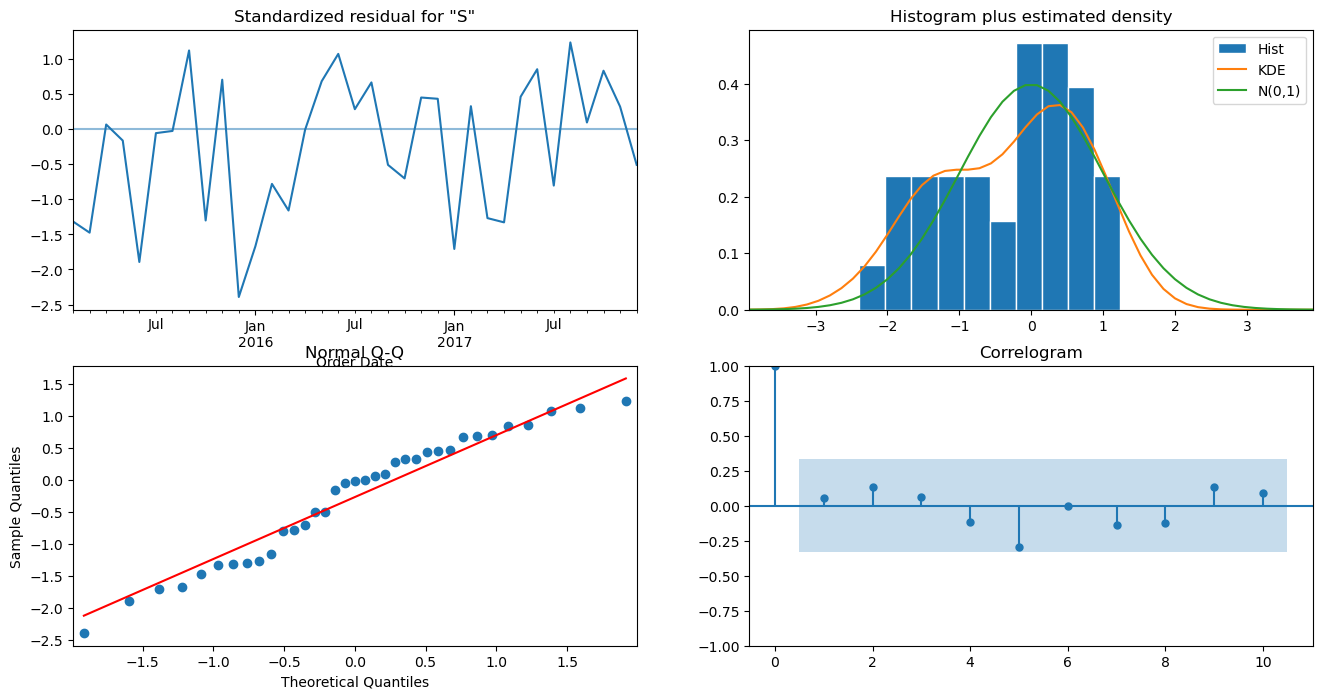

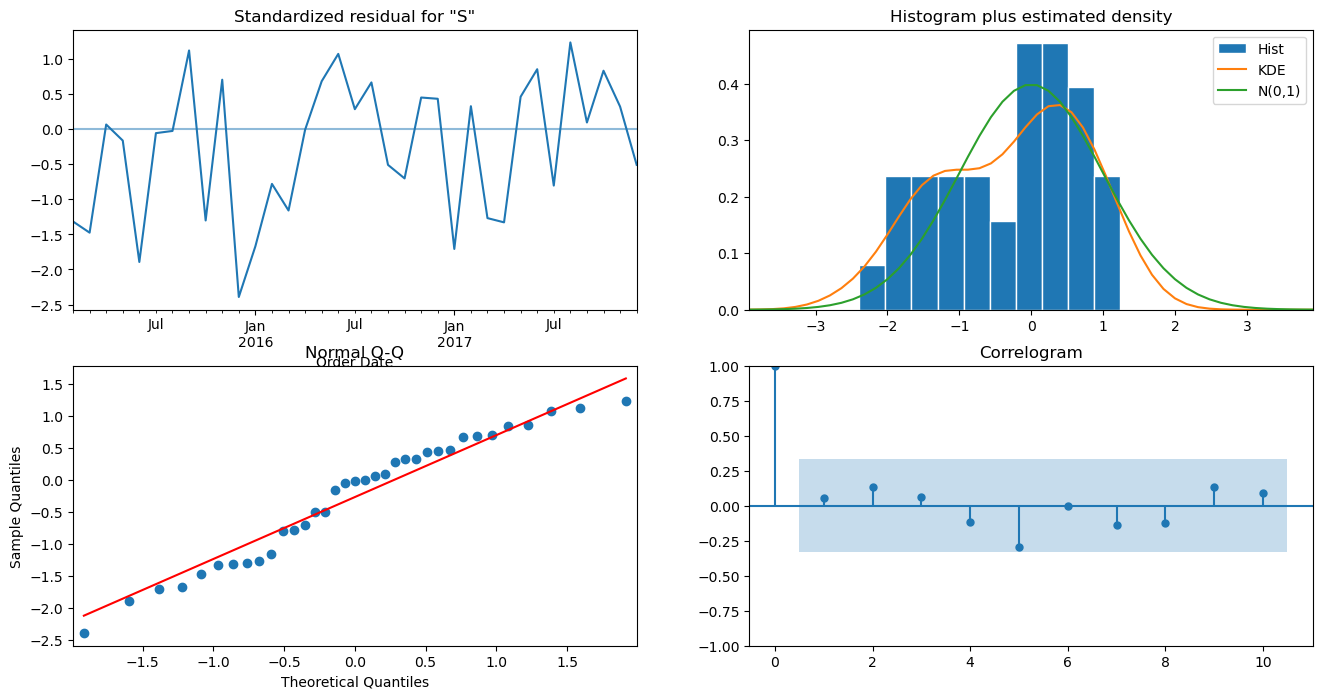

In [97]:
results.plot_diagnostics(figsize=(16,8))

# Validating Forecasts

In [98]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'),dynamic=False)
pred_ci = pred.conf_int()

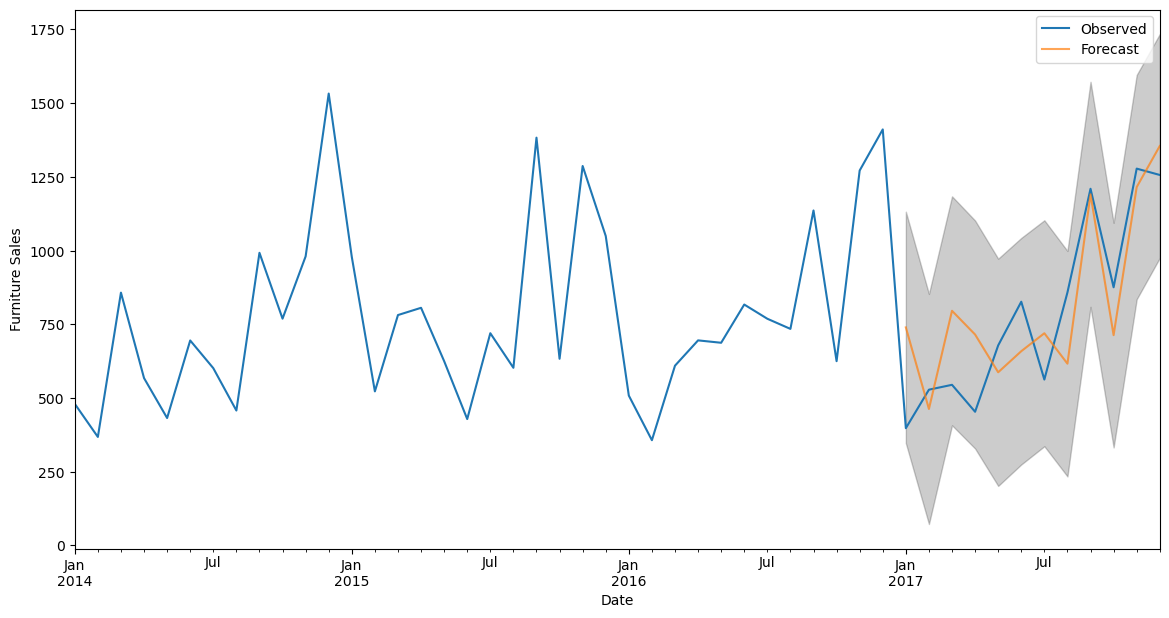

In [100]:
ax = y['2014':].plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='Forecast',alpha=0.7,figsize=(14,7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='k',alpha=0.2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

# Calculating Error

In [102]:
import numpy as np
y_forecasted = pred.predicted_mean
y_actual = y['2016-01-01']

# computing the MSE (Mean Squared Error)

mse = ((y_forecasted-y_actual)**2).mean()

print("MSE is {}".format(round(mse,2)))

MSE is 165859.58


In [103]:
# Calculating RMSE (Root Mean Squared Error)

print("RMSE is {}".format(round(np.sqrt(mse),2)))

RMSE is 407.26


# Producing and Visualizing Forecasts

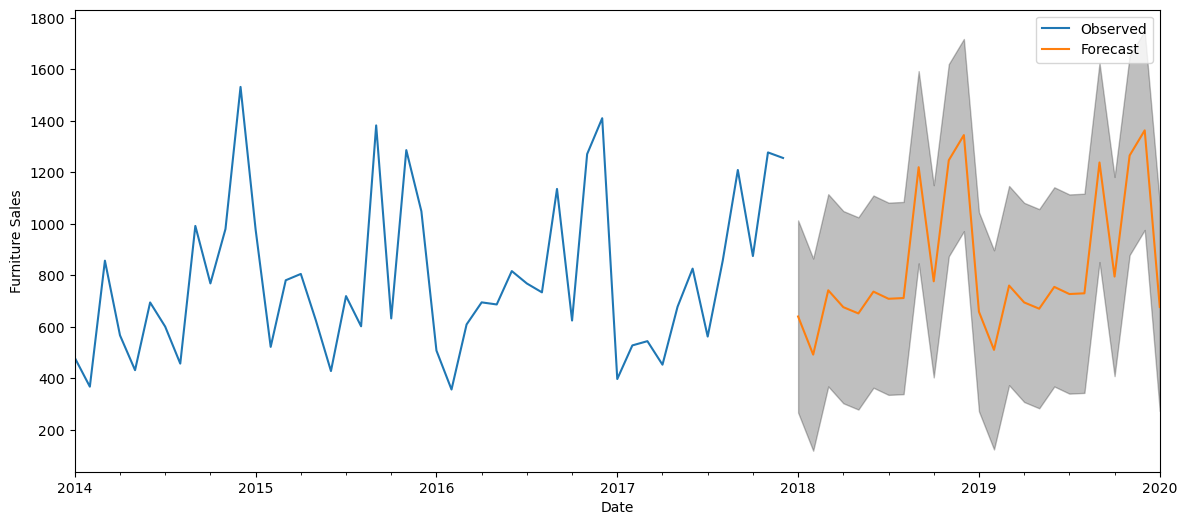

In [105]:
# number of steps to forecast from the end of the sample
pred_uc = results.get_forecast(steps=25)

# returns the confidence interval of fitted parameters
pred_ci = pred_uc.conf_int()

ax = y.plot(label='Observed', figsize=(14,6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

# fill the area between two horizontal curves
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1],
                color = 'k',
                alpha = .25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()